In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def plot_series(time, series, format="-", start=0, end=None, label=None):
    plt.plot(time[start:end], series[start:end], format, label=label)
    plt.xlabel("Time")
    plt.ylabel("Value")
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

In [4]:
def trend(time, slope=0):
    return slope * time

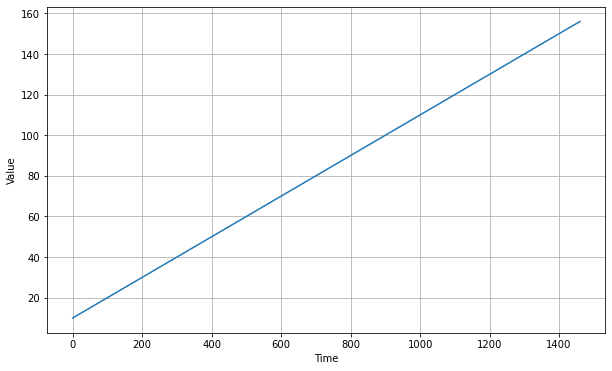

In [5]:
time = np.arange(4 * 365 + 1)
baseline = 10
series = baseline + trend(time, 0.1)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [6]:
time

array([   0,    1,    2, ..., 1458, 1459, 1460])

In [7]:
series

array([ 10. ,  10.1,  10.2, ..., 155.8, 155.9, 156. ])

In [8]:
def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

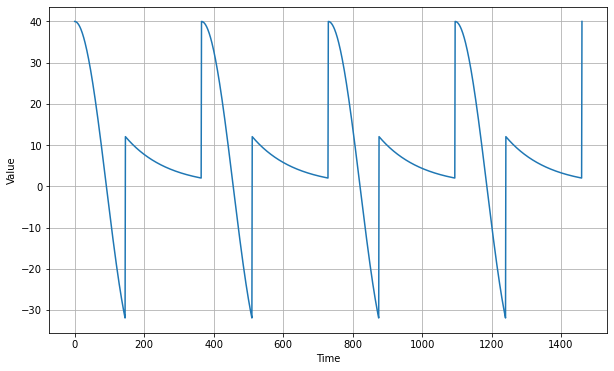

In [9]:
amplitude = 40
series = seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

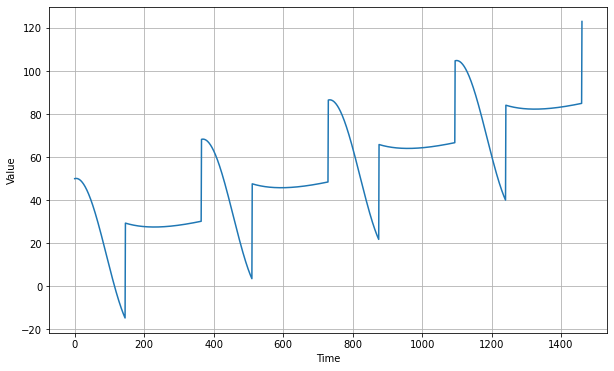

In [10]:
slope = 0.05
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [11]:
def white_noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

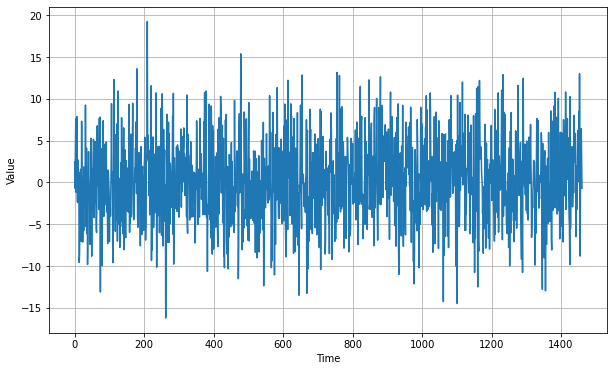

In [12]:
noise_level = 5
noise = white_noise(time, noise_level, seed=42)

plt.figure(figsize=(10, 6))
plot_series(time, noise)
plt.show()

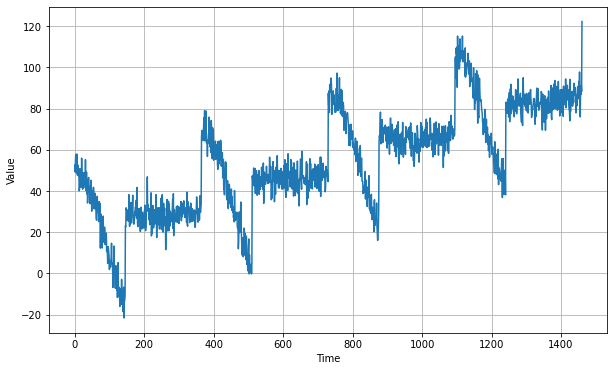

In [13]:
series += noise

plt.figure(figsize=(10, 6))
plot_series(time, series)
plt.show()

In [14]:
import tensorflow as tf

In [15]:
dataset = tf.data.Dataset.range(10)
for val in dataset:
    print(val.numpy())

0
1
2
3
4
5
6
7
8
9


In [16]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 
6 7 8 9 
7 8 9 
8 9 
9 


In [17]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
for window_dataset in dataset:
    for val in window_dataset:
        print(val.numpy(), end=" ")
    print()

0 1 2 3 4 
1 2 3 4 5 
2 3 4 5 6 
3 4 5 6 7 
4 5 6 7 8 
5 6 7 8 9 


In [18]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
for window in dataset:
    print(window.numpy())

[0 1 2 3 4]
[1 2 3 4 5]
[2 3 4 5 6]
[3 4 5 6 7]
[4 5 6 7 8]
[5 6 7 8 9]


In [19]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
for x, y in dataset:
    print(x.numpy(), y.numpy())

[0 1 2 3] [4]
[1 2 3 4] [5]
[2 3 4 5] [6]
[3 4 5 6] [7]
[4 5 6 7] [8]
[5 6 7 8] [9]


In [20]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
for x, y in dataset:
    print(x.numpy(), y.numpy())

[4 5 6 7] [8]
[1 2 3 4] [5]
[5 6 7 8] [9]
[0 1 2 3] [4]
[2 3 4 5] [6]
[3 4 5 6] [7]


In [21]:
dataset = tf.data.Dataset.range(10)
dataset = dataset.window(5, shift=1, drop_remainder=True)
dataset = dataset.flat_map(lambda window: window.batch(5))
dataset = dataset.map(lambda window: (window[:-1], window[-1:]))
dataset = dataset.shuffle(buffer_size=10)
dataset = dataset.batch(2).prefetch(1)
for x, y in dataset:
    print("x =", x.numpy())
    print("y =", y.numpy())

x = [[0 1 2 3]
 [3 4 5 6]]
y = [[4]
 [7]]
x = [[4 5 6 7]
 [1 2 3 4]]
y = [[8]
 [5]]
x = [[2 3 4 5]
 [5 6 7 8]]
y = [[6]
 [9]]


In [22]:
def window_dataset(series, window_size, batch_size=32,
                   shuffle_buffer=1000):
    dataset = tf.data.Dataset.from_tensor_slices(series)
    dataset = dataset.window(window_size + 1, shift=1, drop_remainder=True)
    dataset = dataset.flat_map(lambda window: window.batch(window_size + 1))
    dataset = dataset.shuffle(shuffle_buffer)
    dataset = dataset.map(lambda window: (window[:-1], window[-1]))
    dataset = dataset.batch(batch_size).prefetch(1)
    return dataset

In [23]:
import pandas as pd

In [24]:
dataset = pd.read_csv("../datasets/Stock_data/IBM.csv")

In [25]:
dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2001-01-02,80.783936,83.652008,80.425430,81.082695,47.052982,8375531
1,2001-01-03,80.066925,90.822182,80.066925,90.463669,52.496819,13357315
2,2001-01-04,90.583176,95.363289,88.611374,89.089386,51.699326,16129843
3,2001-01-05,89.806404,90.523422,86.998085,89.866158,52.150112,8413187
4,2001-01-08,89.388145,89.806404,87.535851,89.447899,51.907368,6343781
...,...,...,...,...,...,...,...
5506,2022-11-18,146.559998,148.309998,145.940002,147.639999,147.639999,4659700
5507,2022-11-21,147.550003,147.929993,146.449997,146.679993,146.679993,3476200
5508,2022-11-22,147.600006,149.350006,147.020004,149.100006,149.100006,7062100
5509,2022-11-23,149.100006,150.460007,148.300003,148.750000,148.750000,3658200


In [41]:
prices = dataset['Close']
dates = dataset['Date']

In [42]:
prices

0        81.082695
1        90.463669
2        89.089386
3        89.866158
4        89.447899
           ...    
5506    147.639999
5507    146.679993
5508    149.100006
5509    148.750000
5510    148.369995
Name: Close, Length: 5511, dtype: float64

In [43]:
mod_dataset = window_dataset(prices, 14, batch_size=32)

In [44]:
split_val = int(0.8 * len(prices))
time_train = dates[:split_val]
x_train = prices[:split_val]
time_val = dates[split_val:]
x_valid = prices[split_val:]

In [33]:
from tensorflow import keras
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
model.fit(train_set, epochs=100, validation_data=valid_set)

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


137/137 [==============================] - 1s 4ms/step - loss: 20.7935 - mae: 21.2798 - val_loss: 6.3470 - val_mae: 6.8310
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 4.5545 - mae: 5.0294 - val_loss: 6.1431 - val_mae: 6.6272
Epoch 3/100
137/137 [==============================] - 0s 2ms/step - loss: 4.7686 - mae: 5.2454 - val_loss: 5.2968 - val_mae: 5.7759
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 4.2553 - mae: 4.7270 - val_loss: 5.1090 - val_mae: 5.5838
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 3.7443 - mae: 4.2153 - val_loss: 4.9231 - val_mae: 5.3991
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 3.5264 - mae: 3.9953 - val_loss: 6.1105 - val_mae: 6.5990
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 3.5035 - mae: 3.9741 - val_loss: 4.1878 - val_mae: 4.6598
Epoch 8/100
137/137 [==============================] - 0s 2ms/step - loss: 3.25

137/137 [==============================] - 0s 2ms/step - loss: 1.8547 - mae: 2.3047 - val_loss: 1.7009 - val_mae: 2.1481
Epoch 63/100
137/137 [==============================] - 0s 2ms/step - loss: 1.5333 - mae: 1.9719 - val_loss: 2.6463 - val_mae: 3.1211
Epoch 64/100
137/137 [==============================] - 0s 2ms/step - loss: 1.6555 - mae: 2.0974 - val_loss: 1.7847 - val_mae: 2.2366
Epoch 65/100
137/137 [==============================] - 0s 2ms/step - loss: 1.7988 - mae: 2.2497 - val_loss: 2.1301 - val_mae: 2.5882
Epoch 66/100
137/137 [==============================] - 0s 2ms/step - loss: 1.3731 - mae: 1.8060 - val_loss: 1.5253 - val_mae: 1.9558
Epoch 67/100
137/137 [==============================] - 0s 2ms/step - loss: 1.6364 - mae: 2.0760 - val_loss: 1.5936 - val_mae: 2.0366
Epoch 68/100
137/137 [==============================] - 0s 2ms/step - loss: 1.7445 - mae: 2.1852 - val_loss: 2.5861 - val_mae: 3.0596
Epoch 69/100
137/137 [==============================] - 0s 2ms/step - loss:

In [34]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-6 * 10**(epoch / 30))
optimizer = keras.optimizers.SGD(lr=1e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100
137/137 [==============================] - 1s 2ms/step - loss: 48.6484 - mae: 49.1356 - lr: 1.0000e-06
Epoch 2/100
137/137 [==============================] - 0s 1ms/step - loss: 2.9443 - mae: 3.4089 - lr: 1.0798e-06
Epoch 3/100
137/137 [==============================] - 0s 2ms/step - loss: 2.8680 - mae: 3.3331 - lr: 1.1659e-06
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 2.7986 - mae: 3.2613 - lr: 1.2589e-06
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 2.7379 - mae: 3.2011 - lr: 1.3594e-06
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 2.6883 - mae: 3.1485 - lr: 1.4678e-06
Epoch 7/100
137/137 [==============================] - 0s 1ms/step - loss: 2.5858 - mae: 3.0462 - lr: 1.5849e-06
Epoch 8/100
137/137 [==============================] - 0s 2ms/step - loss: 2.5185 - mae: 2.9769 - lr: 1.7113e-06
Epoch 9/100
137/137 [==============================] - 0s 1ms/step - loss: 2.4623 - mae: 2.918

137/137 [==============================] - 0s 2ms/step - loss: 148.2749 - mae: 148.7741 - lr: 2.3263e-04
Epoch 73/100
137/137 [==============================] - 0s 2ms/step - loss: 113.6515 - mae: 114.1506 - lr: 2.5119e-04
Epoch 74/100
137/137 [==============================] - 0s 2ms/step - loss: 150.2043 - mae: 150.7021 - lr: 2.7123e-04
Epoch 75/100
137/137 [==============================] - 0s 1ms/step - loss: 190.2711 - mae: 190.7711 - lr: 2.9286e-04
Epoch 76/100
137/137 [==============================] - 0s 2ms/step - loss: 201.4766 - mae: 201.9765 - lr: 3.1623e-04
Epoch 77/100
137/137 [==============================] - 0s 1ms/step - loss: 189.5047 - mae: 190.0039 - lr: 3.4145e-04
Epoch 78/100
137/137 [==============================] - 0s 2ms/step - loss: 221.9531 - mae: 222.4529 - lr: 3.6869e-04
Epoch 79/100
137/137 [==============================] - 0s 1ms/step - loss: 209.2218 - mae: 209.7213 - lr: 3.9811e-04
Epoch 80/100
137/137 [==============================] - 0s 1ms/step -

(1e-06, 0.001, 0.0, 20.0)

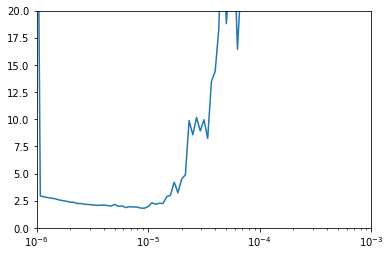

In [35]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-6, 1e-3, 0, 20])

In [36]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(1, input_shape=[window_size])
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
137/137 [==============================] - 1s 4ms/step - loss: 20.7935 - mae: 21.2798 - val_loss: 6.3470 - val_mae: 6.8310
Epoch 2/500
137/137 [==============================] - 0s 2ms/step - loss: 4.5545 - mae: 5.0294 - val_loss: 6.1431 - val_mae: 6.6272
Epoch 3/500
137/137 [==============================] - 0s 2ms/step - loss: 4.7686 - mae: 5.2454 - val_loss: 5.2968 - val_mae: 5.7759
Epoch 4/500
137/137 [==============================] - 0s 2ms/step - loss: 4.2553 - mae: 4.7270 - val_loss: 5.1090 - val_mae: 5.5838
Epoch 5/500
137/137 [==============================] - 0s 2ms/step - loss: 3.7443 - mae: 4.2153 - val_loss: 4.9231 - val_mae: 5.3991
Epoch 6/500
137/137 [==============================] - 0s 2ms/step - loss: 3.5264 - mae: 3.9953 - val_loss: 6.1105 - val_mae: 6.5990
Epoch 7/500
137/137 [==============================] - 0s 2ms/step - loss: 3.5035 - mae: 3.9741 - val_loss: 4.1878 - val_mae: 4.6598
Epoch 8/500
137/137 [==============================] - 0s 2ms/step 

137/137 [==============================] - 0s 2ms/step - loss: 1.8547 - mae: 2.3047 - val_loss: 1.7009 - val_mae: 2.1481
Epoch 63/500
137/137 [==============================] - 0s 2ms/step - loss: 1.5333 - mae: 1.9719 - val_loss: 2.6463 - val_mae: 3.1211
Epoch 64/500
137/137 [==============================] - 0s 2ms/step - loss: 1.6555 - mae: 2.0974 - val_loss: 1.7847 - val_mae: 2.2366
Epoch 65/500
137/137 [==============================] - 0s 2ms/step - loss: 1.7988 - mae: 2.2497 - val_loss: 2.1301 - val_mae: 2.5882
Epoch 66/500
137/137 [==============================] - 0s 2ms/step - loss: 1.3731 - mae: 1.8060 - val_loss: 1.5253 - val_mae: 1.9558
Epoch 67/500
137/137 [==============================] - 0s 2ms/step - loss: 1.6364 - mae: 2.0760 - val_loss: 1.5936 - val_mae: 2.0366
Epoch 68/500
137/137 [==============================] - 0s 2ms/step - loss: 1.7445 - mae: 2.1852 - val_loss: 2.5861 - val_mae: 3.0596
Epoch 69/500
137/137 [==============================] - 0s 2ms/step - loss:

In [38]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [39]:
lin_forecast = model_forecast(model, prices[split_val - window_size:-1], window_size)[:, 0]

35/35 [==============================] - 0s 2ms/step


In [40]:
lin_forecast.shape

(1103,)

C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


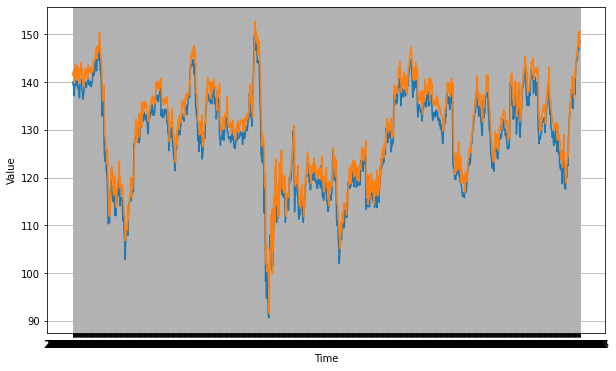

In [45]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, lin_forecast)

In [46]:
keras.metrics.mean_absolute_error(x_valid, lin_forecast).numpy()

2.7812393

In [47]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


137/137 [==============================] - 1s 2ms/step - loss: 85.0166 - mae: 85.5166 - lr: 1.0000e-07
Epoch 2/100
137/137 [==============================] - 0s 2ms/step - loss: 7.6708 - mae: 8.1502 - lr: 1.1220e-07
Epoch 3/100
137/137 [==============================] - 0s 2ms/step - loss: 2.7780 - mae: 3.2402 - lr: 1.2589e-07
Epoch 4/100
137/137 [==============================] - 0s 2ms/step - loss: 2.7328 - mae: 3.1962 - lr: 1.4125e-07
Epoch 5/100
137/137 [==============================] - 0s 2ms/step - loss: 2.6419 - mae: 3.1020 - lr: 1.5849e-07
Epoch 6/100
137/137 [==============================] - 0s 2ms/step - loss: 2.5403 - mae: 2.9986 - lr: 1.7783e-07
Epoch 7/100
137/137 [==============================] - 0s 2ms/step - loss: 2.5052 - mae: 2.9651 - lr: 1.9953e-07
Epoch 8/100
137/137 [==============================] - 0s 2ms/step - loss: 2.4920 - mae: 2.9481 - lr: 2.2387e-07
Epoch 9/100
137/137 [==============================] - 0s 2ms/step - loss: 2.4854 - mae: 2.9427 - lr: 2.51

137/137 [==============================] - 0s 2ms/step - loss: 122.9037 - mae: 123.4037 - lr: 3.5481e-04
Epoch 73/100
137/137 [==============================] - 0s 2ms/step - loss: 122.3919 - mae: 122.8919 - lr: 3.9811e-04
Epoch 74/100
137/137 [==============================] - 0s 2ms/step - loss: 121.8176 - mae: 122.3176 - lr: 4.4668e-04
Epoch 75/100
137/137 [==============================] - 0s 2ms/step - loss: 121.1731 - mae: 121.6731 - lr: 5.0119e-04
Epoch 76/100
137/137 [==============================] - 0s 2ms/step - loss: 120.4487 - mae: 120.9487 - lr: 5.6234e-04
Epoch 77/100
137/137 [==============================] - 0s 2ms/step - loss: 119.6296 - mae: 120.1296 - lr: 6.3096e-04
Epoch 78/100
137/137 [==============================] - 0s 2ms/step - loss: 118.6702 - mae: 119.1702 - lr: 7.0795e-04
Epoch 79/100
137/137 [==============================] - 0s 2ms/step - loss: 117.2889 - mae: 117.7889 - lr: 7.9433e-04
Epoch 80/100
137/137 [==============================] - 0s 2ms/step -

(1e-07, 0.005, 0.0, 30.0)

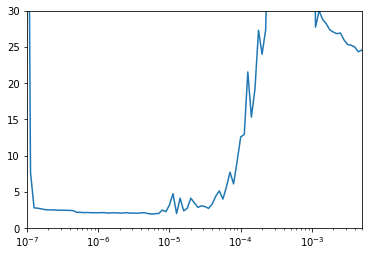

In [48]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 5e-3, 0, 30])

In [49]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
137/137 [==============================] - 1s 4ms/step - loss: 8.8311 - mae: 9.3070 - val_loss: 4.4034 - val_mae: 4.8790
Epoch 2/500
137/137 [==============================] - 0s 3ms/step - loss: 3.1235 - mae: 3.5917 - val_loss: 3.7687 - val_mae: 4.2414
Epoch 3/500
137/137 [==============================] - 0s 3ms/step - loss: 2.7516 - mae: 3.2149 - val_loss: 3.2829 - val_mae: 3.7508
Epoch 4/500
137/137 [==============================] - 0s 3ms/step - loss: 2.8382 - mae: 3.3010 - val_loss: 3.4052 - val_mae: 3.8735
Epoch 5/500
137/137 [==============================] - 0s 3ms/step - loss: 2.4049 - mae: 2.8647 - val_loss: 3.2998 - val_mae: 3.7651
Epoch 6/500
137/137 [==============================] - 1s 3ms/step - loss: 2.3956 - mae: 2.8552 - val_loss: 3.4698 - val_mae: 3.9437
Epoch 7/500
137/137 [==============================] - 0s 3ms/step - loss: 2.2367 - mae: 2.6884 - val_loss: 2.8651 - val_mae: 3.3244
Epoch 8/500
137/137 [==============================] - 0s 3ms/step - 

137/137 [==============================] - 0s 3ms/step - loss: 1.4659 - mae: 1.9039 - val_loss: 1.6825 - val_mae: 2.1256
Epoch 63/500
137/137 [==============================] - 0s 3ms/step - loss: 1.2966 - mae: 1.7250 - val_loss: 2.5518 - val_mae: 3.0274
Epoch 64/500
137/137 [==============================] - 0s 3ms/step - loss: 1.3052 - mae: 1.7349 - val_loss: 1.4515 - val_mae: 1.8857
Epoch 65/500
137/137 [==============================] - 0s 3ms/step - loss: 1.5300 - mae: 1.9630 - val_loss: 1.8211 - val_mae: 2.2677
Epoch 66/500
137/137 [==============================] - 0s 3ms/step - loss: 1.3887 - mae: 1.8159 - val_loss: 1.6998 - val_mae: 2.1430
Epoch 67/500
137/137 [==============================] - 0s 3ms/step - loss: 1.5328 - mae: 1.9680 - val_loss: 1.4559 - val_mae: 1.8900
Epoch 68/500
137/137 [==============================] - 0s 3ms/step - loss: 1.2823 - mae: 1.7076 - val_loss: 1.4397 - val_mae: 1.8765
Epoch 69/500
137/137 [==============================] - 0s 3ms/step - loss:

In [52]:
dense_forecast = model_forecast(
    model,
    prices[split_val - window_size:-1],
    window_size)[:, 0]

35/35 [==============================] - 0s 2ms/step


C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


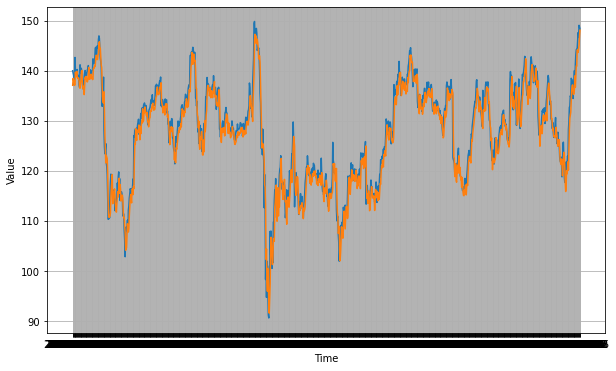

In [54]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, dense_forecast)

In [55]:
keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy()

2.00269

In [56]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size)
valid_set = window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.Dense(10, activation="relu", input_shape=[window_size]),
  keras.layers.Dense(10, activation="relu"),
  keras.layers.Dense(1)
])

optimizer = keras.optimizers.Adam()
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
137/137 [==============================] - 1s 4ms/step - loss: 9.9077 - mae: 10.3892 - val_loss: 5.6524 - val_mae: 6.1341
Epoch 2/500
137/137 [==============================] - 0s 3ms/step - loss: 4.0145 - mae: 4.4868 - val_loss: 5.1305 - val_mae: 5.6111
Epoch 3/500
137/137 [==============================] - 0s 3ms/step - loss: 3.6230 - mae: 4.0944 - val_loss: 4.6772 - val_mae: 5.1550
Epoch 4/500
137/137 [==============================] - 0s 3ms/step - loss: 3.2330 - mae: 3.7001 - val_loss: 4.0948 - val_mae: 4.5695
Epoch 5/500
137/137 [==============================] - 0s 3ms/step - loss: 2.9899 - mae: 3.4546 - val_loss: 3.5954 - val_mae: 4.0623
Epoch 6/500
137/137 [==============================] - 0s 3ms/step - loss: 2.5527 - mae: 3.0140 - val_loss: 3.3463 - val_mae: 3.8187
Epoch 7/500
137/137 [==============================] - 0s 3ms/step - loss: 2.2615 - mae: 2.7168 - val_loss: 2.8943 - val_mae: 3.3558
Epoch 8/500
137/137 [==============================] - 0s 3ms/step -

137/137 [==============================] - 0s 3ms/step - loss: 1.2070 - mae: 1.6265 - val_loss: 1.5128 - val_mae: 1.9489
Epoch 63/500
137/137 [==============================] - 0s 3ms/step - loss: 1.2299 - mae: 1.6535 - val_loss: 1.9332 - val_mae: 2.3892
Epoch 64/500
137/137 [==============================] - 0s 3ms/step - loss: 1.2720 - mae: 1.6968 - val_loss: 1.5261 - val_mae: 1.9650
Epoch 65/500
137/137 [==============================] - 0s 3ms/step - loss: 1.2072 - mae: 1.6321 - val_loss: 1.5233 - val_mae: 1.9580
Epoch 66/500
137/137 [==============================] - 0s 3ms/step - loss: 1.2343 - mae: 1.6610 - val_loss: 1.4982 - val_mae: 1.9340
Epoch 67/500
137/137 [==============================] - 0s 3ms/step - loss: 1.1898 - mae: 1.6090 - val_loss: 1.7797 - val_mae: 2.2285
Epoch 68/500
137/137 [==============================] - 0s 3ms/step - loss: 1.2676 - mae: 1.6912 - val_loss: 1.5065 - val_mae: 1.9403
Epoch 69/500
137/137 [==============================] - 0s 3ms/step - loss:

137/137 [==============================] - 0s 3ms/step - loss: 1.1254 - mae: 1.5459 - val_loss: 1.3637 - val_mae: 1.7936
Epoch 124/500
137/137 [==============================] - 0s 3ms/step - loss: 1.1133 - mae: 1.5331 - val_loss: 1.4991 - val_mae: 1.9371
Epoch 125/500
137/137 [==============================] - 1s 3ms/step - loss: 1.0788 - mae: 1.4921 - val_loss: 1.3689 - val_mae: 1.7985
Epoch 126/500
137/137 [==============================] - 0s 3ms/step - loss: 1.0531 - mae: 1.4679 - val_loss: 1.3613 - val_mae: 1.7955
Epoch 127/500
137/137 [==============================] - 0s 3ms/step - loss: 1.0949 - mae: 1.5105 - val_loss: 1.3830 - val_mae: 1.8132
Epoch 128/500
137/137 [==============================] - 0s 3ms/step - loss: 1.1180 - mae: 1.5380 - val_loss: 1.3531 - val_mae: 1.7863
Epoch 129/500
137/137 [==============================] - 0s 3ms/step - loss: 1.1037 - mae: 1.5241 - val_loss: 1.4407 - val_mae: 1.8778
Epoch 130/500
137/137 [==============================] - 0s 3ms/step 

Epoch 184/500
137/137 [==============================] - 0s 3ms/step - loss: 1.0944 - mae: 1.5137 - val_loss: 1.3229 - val_mae: 1.7520
Epoch 185/500
137/137 [==============================] - 0s 3ms/step - loss: 1.0058 - mae: 1.4166 - val_loss: 1.2921 - val_mae: 1.7222


In [57]:
dense_forecast = model_forecast(
    model,
    prices[split_val - window_size:-1],
    window_size)[:, 0]

35/35 [==============================] - 0s 2ms/step


In [58]:
keras.metrics.mean_absolute_error(x_valid, dense_forecast).numpy()

1.7099396

In [59]:
split_val = int(0.8 * len(prices))
time_train = dates[:split_val]
x_train = prices[:split_val]
time_val = dates[split_val:]
x_valid = prices[split_val:]

In [60]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


35/35 [==============================] - 2s 15ms/step - loss: 29.0802 - mae: 29.5767 - lr: 1.0000e-07
Epoch 2/100
35/35 [==============================] - 1s 15ms/step - loss: 32.2091 - mae: 32.7064 - lr: 1.1220e-07
Epoch 3/100
35/35 [==============================] - 1s 17ms/step - loss: 29.8678 - mae: 30.3653 - lr: 1.2589e-07
Epoch 4/100
35/35 [==============================] - 1s 16ms/step - loss: 27.7511 - mae: 28.2487 - lr: 1.4125e-07
Epoch 5/100
35/35 [==============================] - 1s 17ms/step - loss: 27.9278 - mae: 28.4251 - lr: 1.5849e-07
Epoch 6/100
35/35 [==============================] - 1s 15ms/step - loss: 27.6869 - mae: 28.1848 - lr: 1.7783e-07
Epoch 7/100
35/35 [==============================] - 1s 16ms/step - loss: 28.4116 - mae: 28.9082 - lr: 1.9953e-07
Epoch 8/100
35/35 [==============================] - 1s 17ms/step - loss: 26.7178 - mae: 27.2152 - lr: 2.2387e-07
Epoch 9/100
35/35 [==============================] - 1s 16ms/step - loss: 27.3565 - mae: 27.8525 - l

35/35 [==============================] - 1s 16ms/step - loss: 1501.3477 - mae: 1501.8477 - lr: 3.5481e-04
Epoch 73/100
35/35 [==============================] - 1s 16ms/step - loss: 2489.6191 - mae: 2490.1191 - lr: 3.9811e-04
Epoch 74/100
35/35 [==============================] - 1s 16ms/step - loss: 1481.9789 - mae: 1482.4789 - lr: 4.4668e-04
Epoch 75/100
35/35 [==============================] - 1s 16ms/step - loss: 1146.2230 - mae: 1146.7230 - lr: 5.0119e-04
Epoch 76/100
35/35 [==============================] - 1s 16ms/step - loss: 2035.9746 - mae: 2036.4746 - lr: 5.6234e-04
Epoch 77/100
35/35 [==============================] - 1s 16ms/step - loss: 3530.2209 - mae: 3530.7209 - lr: 6.3096e-04
Epoch 78/100
35/35 [==============================] - 1s 16ms/step - loss: 4822.2236 - mae: 4822.7231 - lr: 7.0795e-04
Epoch 79/100
35/35 [==============================] - 1s 17ms/step - loss: 2478.3164 - mae: 2478.8159 - lr: 7.9433e-04
Epoch 80/100
35/35 [==============================] - 1s 16ms

(1e-07, 0.0001, 0.0, 30.0)

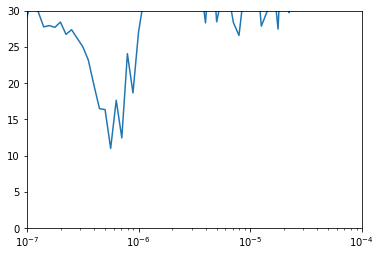

In [61]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 1e-4, 0, 30])

In [62]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = window_dataset(x_train, window_size, batch_size=128)
valid_set = window_dataset(x_valid, window_size, batch_size=128)

model = keras.models.Sequential([
  keras.layers.Lambda(lambda x: tf.expand_dims(x, axis=-1),
                      input_shape=[None]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.SimpleRNN(100),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=1.5e-6, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint", save_best_only=True)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
     34/Unknown - 1s 16ms/step - loss: 35.3765 - mae: 35.8722INFO:tensorflow:Assets written to: my_checkpoint\assets
35/35 [==============================] - 4s 81ms/step - loss: 35.2805 - mae: 35.7761 - val_loss: 21.1276 - val_mae: 21.6269
Epoch 2/500
35/35 [==============================] - 3s 72ms/step - loss: 29.6396 - mae: 30.1357 - val_loss: 10.1366 - val_mae: 10.6266
Epoch 3/500
35/35 [==============================] - 1s 20ms/step - loss: 26.2126 - mae: 26.7085 - val_loss: 11.8788 - val_mae: 12.3746
Epoch 4/500
35/35 [==============================] - 1s 20ms/step - loss: 25.6741 - mae: 26.1701 - val_loss: 13.2287 - val_mae: 13.7247
Epoch 5/500
35/35 [==============================] - 1s 20ms/step - loss: 29.5603 - mae: 30.0563 - val_loss: 15.1047 - val_mae: 15.6006
Epoch 6/500
35/35 [==============================] - 1s 20ms/step - loss: 32.1757 - mae: 32.6727 - val_loss: 48.5336 - val_mae: 49.0336
Epoch 7/500
35/35 [==============================] - 1s 20ms/step -

In [63]:
model = keras.models.load_model("my_checkpoint")

In [64]:
rnn_forecast = model_forecast(
    model,
    prices[split_val - window_size:-1],
    window_size)[:, 0]

35/35 [==============================] - 0s 5ms/step


C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


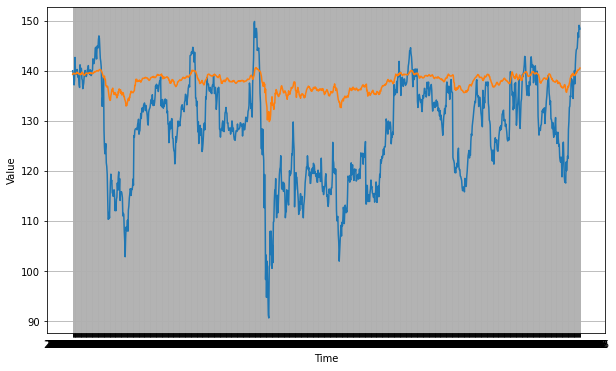

In [66]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, rnn_forecast)

In [67]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

10.368699

In [68]:
def seq2seq_window_dataset(series, window_size, batch_size=32,
                           shuffle_buffer=1000):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [69]:
for X_batch, Y_batch in seq2seq_window_dataset(tf.range(10), 3,
                                               batch_size=1):
    print("X:", X_batch.numpy())
    print("Y:", Y_batch.numpy())

X: [[[1]
  [2]
  [3]]]
Y: [[[2]
  [3]
  [4]]]
X: [[[2]
  [3]
  [4]]]
Y: [[[3]
  [4]
  [5]]]
X: [[[4]
  [5]
  [6]]]
Y: [[[5]
  [6]
  [7]]]
X: [[[3]
  [4]
  [5]]]
Y: [[[4]
  [5]
  [6]]]
X: [[[5]
  [6]
  [7]]]
Y: [[[6]
  [7]
  [8]]]
X: [[[6]
  [7]
  [8]]]
Y: [[[7]
  [8]
  [9]]]
X: [[[0]
  [1]
  [2]]]
Y: [[[1]
  [2]
  [3]]]


In [70]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True,
                         input_shape=[None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-7 * 10**(epoch / 30))
optimizer = keras.optimizers.SGD(lr=1e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


35/35 [==============================] - 2s 20ms/step - loss: 32.9397 - mae: 33.4363 - lr: 1.0000e-07
Epoch 2/100
35/35 [==============================] - 1s 19ms/step - loss: 37.6443 - mae: 38.1421 - lr: 1.0798e-07
Epoch 3/100
35/35 [==============================] - 1s 20ms/step - loss: 34.6242 - mae: 35.1216 - lr: 1.1659e-07
Epoch 4/100
35/35 [==============================] - 1s 21ms/step - loss: 30.6596 - mae: 31.1568 - lr: 1.2589e-07
Epoch 5/100
35/35 [==============================] - 1s 20ms/step - loss: 29.9361 - mae: 30.4332 - lr: 1.3594e-07
Epoch 6/100
35/35 [==============================] - 1s 20ms/step - loss: 30.1426 - mae: 30.6398 - lr: 1.4678e-07
Epoch 7/100
35/35 [==============================] - 1s 20ms/step - loss: 30.7878 - mae: 31.2853 - lr: 1.5849e-07
Epoch 8/100
35/35 [==============================] - 1s 20ms/step - loss: 29.3089 - mae: 29.8066 - lr: 1.7113e-07
Epoch 9/100
35/35 [==============================] - 1s 19ms/step - loss: 30.3183 - mae: 30.8158 - l

35/35 [==============================] - 1s 19ms/step - loss: 30.4412 - mae: 30.9370 - lr: 2.3263e-05
Epoch 73/100
35/35 [==============================] - 1s 19ms/step - loss: 28.0592 - mae: 28.5557 - lr: 2.5119e-05
Epoch 74/100
35/35 [==============================] - 1s 19ms/step - loss: 25.2467 - mae: 25.7430 - lr: 2.7123e-05
Epoch 75/100
35/35 [==============================] - 1s 19ms/step - loss: 26.9695 - mae: 27.4643 - lr: 2.9286e-05
Epoch 76/100
35/35 [==============================] - 1s 19ms/step - loss: 40.0923 - mae: 40.5903 - lr: 3.1623e-05
Epoch 77/100
35/35 [==============================] - 1s 19ms/step - loss: 37.7003 - mae: 38.1976 - lr: 3.4145e-05
Epoch 78/100
35/35 [==============================] - 1s 19ms/step - loss: 46.8149 - mae: 47.3122 - lr: 3.6869e-05
Epoch 79/100
35/35 [==============================] - 1s 19ms/step - loss: 45.7330 - mae: 46.2311 - lr: 3.9811e-05
Epoch 80/100
35/35 [==============================] - 1s 19ms/step - loss: 39.4202 - mae: 39.

(1e-07, 0.0001, 0.0, 30.0)

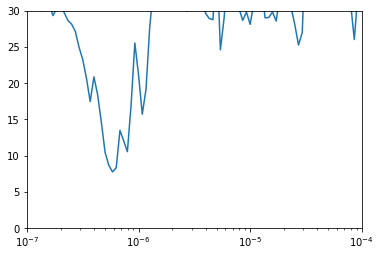

In [71]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-7, 1e-4, 0, 30])

In [77]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True,
                         input_shape=[None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.Adam()
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
early_stopping = keras.callbacks.EarlyStopping(patience=10)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping])

Epoch 1/500
35/35 [==============================] - 2s 32ms/step - loss: 42.6103 - mae: 43.1069 - val_loss: 11.9726 - val_mae: 12.4704
Epoch 2/500
35/35 [==============================] - 1s 25ms/step - loss: 15.9367 - mae: 16.4311 - val_loss: 10.0372 - val_mae: 10.5345
Epoch 3/500
35/35 [==============================] - 1s 24ms/step - loss: 9.4974 - mae: 9.9893 - val_loss: 17.8897 - val_mae: 18.3897
Epoch 4/500
35/35 [==============================] - 1s 24ms/step - loss: 8.5546 - mae: 9.0433 - val_loss: 8.7317 - val_mae: 9.2286
Epoch 5/500
35/35 [==============================] - 1s 24ms/step - loss: 6.1581 - mae: 6.6418 - val_loss: 10.5725 - val_mae: 11.0722
Epoch 6/500
35/35 [==============================] - 1s 23ms/step - loss: 12.6210 - mae: 13.1153 - val_loss: 5.8633 - val_mae: 6.3603
Epoch 7/500
35/35 [==============================] - 1s 23ms/step - loss: 7.8087 - mae: 8.2908 - val_loss: 4.6571 - val_mae: 5.1518
Epoch 8/500
35/35 [==============================] - 1s 24ms/s

In [78]:
rnn_forecast = model_forecast(model, prices[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_val - window_size:-1, -1, 0]

      1/Unknown - 0s 170ms/step

C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2730189074.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model_forecast(model, prices[..., np.newaxis], window_size)


172/172 [==============================] - 1s 5ms/step


C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


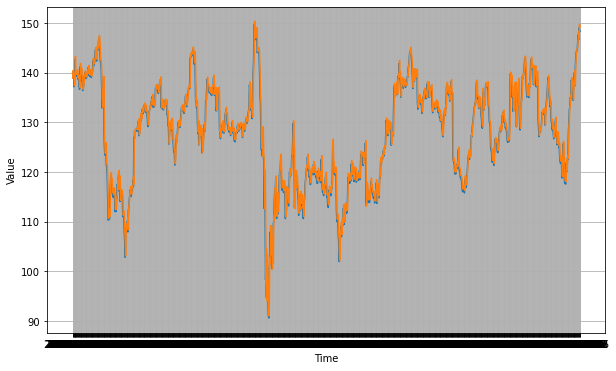

In [79]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, rnn_forecast)

In [80]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

1.5205021

In [81]:
def sequential_window_dataset(series, window_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=window_size, drop_remainder=True)
    ds = ds.flat_map(lambda window: window.batch(window_size + 1))
    ds = ds.map(lambda window: (window[:-1], window[1:]))
    return ds.batch(1).prefetch(1)

In [82]:
for X_batch, y_batch in sequential_window_dataset(tf.range(10), 3):
    print(X_batch.numpy(), y_batch.numpy())

[[[0]
  [1]
  [2]]] [[[1]
  [2]
  [3]]]
[[[3]
  [4]
  [5]]] [[[4]
  [5]
  [6]]]
[[[6]
  [7]
  [8]]] [[[7]
  [8]
  [9]]]


In [83]:
class ResetStatesCallback(keras.callbacks.Callback):
    def on_epoch_begin(self, epoch, logs):
        self.model.reset_states()

In [85]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 30))
reset_states = ResetStatesCallback()
optimizer = keras.optimizers.Adam(lr=1e-8)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100,
                    callbacks=[lr_schedule, reset_states])

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


146/146 [==============================] - 2s 6ms/step - loss: 47.8364 - mae: 48.3358 - lr: 1.0000e-08
Epoch 2/100
146/146 [==============================] - 1s 6ms/step - loss: 47.8158 - mae: 48.3152 - lr: 1.0798e-08
Epoch 3/100
146/146 [==============================] - 1s 6ms/step - loss: 47.8007 - mae: 48.3001 - lr: 1.1659e-08
Epoch 4/100
146/146 [==============================] - 1s 6ms/step - loss: 47.7795 - mae: 48.2790 - lr: 1.2589e-08
Epoch 5/100
146/146 [==============================] - 1s 6ms/step - loss: 47.7578 - mae: 48.2573 - lr: 1.3594e-08
Epoch 6/100
146/146 [==============================] - 1s 6ms/step - loss: 47.7343 - mae: 48.2338 - lr: 1.4678e-08
Epoch 7/100
146/146 [==============================] - 1s 6ms/step - loss: 47.7099 - mae: 48.2094 - lr: 1.5849e-08
Epoch 8/100
146/146 [==============================] - 1s 6ms/step - loss: 47.6848 - mae: 48.1843 - lr: 1.7113e-08
Epoch 9/100
146/146 [==============================] - 1s 6ms/step - loss: 47.6595 - mae: 48

146/146 [==============================] - 1s 6ms/step - loss: 21.4867 - mae: 21.9801 - lr: 2.1544e-06
Epoch 72/100
146/146 [==============================] - 1s 6ms/step - loss: 18.6607 - mae: 19.1560 - lr: 2.3263e-06
Epoch 73/100
146/146 [==============================] - 1s 6ms/step - loss: 16.0155 - mae: 16.5101 - lr: 2.5119e-06
Epoch 74/100
146/146 [==============================] - 1s 6ms/step - loss: 13.7565 - mae: 14.2521 - lr: 2.7123e-06
Epoch 75/100
146/146 [==============================] - 1s 6ms/step - loss: 11.2075 - mae: 11.6983 - lr: 2.9286e-06
Epoch 76/100
146/146 [==============================] - 1s 6ms/step - loss: 10.1464 - mae: 10.6313 - lr: 3.1623e-06
Epoch 77/100
146/146 [==============================] - 1s 6ms/step - loss: 9.4781 - mae: 9.9539 - lr: 3.4145e-06
Epoch 78/100
146/146 [==============================] - 1s 6ms/step - loss: 8.9407 - mae: 9.4210 - lr: 3.6869e-06
Epoch 79/100
146/146 [==============================] - 1s 6ms/step - loss: 8.1883 - mae:

(1e-08, 0.0001, 0.0, 30.0)

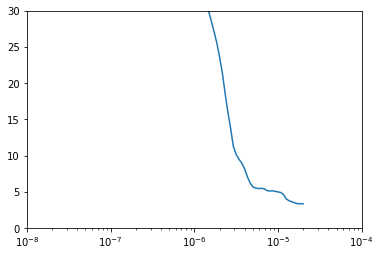

In [86]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [88]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)
valid_set = sequential_window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.SimpleRNN(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.Adam(lr=1e-5)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
reset_states = ResetStatesCallback()
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint, reset_states])

Epoch 1/500
146/146 [==============================] - 2s 8ms/step - loss: 28.0092 - mae: 28.5032 - val_loss: 21.7884 - val_mae: 22.2873
Epoch 2/500
146/146 [==============================] - 1s 7ms/step - loss: 26.4817 - mae: 26.9765 - val_loss: 17.1145 - val_mae: 17.6107
Epoch 3/500
146/146 [==============================] - 1s 7ms/step - loss: 22.8360 - mae: 23.3304 - val_loss: 14.6856 - val_mae: 15.1815
Epoch 4/500
146/146 [==============================] - 1s 7ms/step - loss: 19.9177 - mae: 20.4126 - val_loss: 13.5054 - val_mae: 14.0015
Epoch 5/500
146/146 [==============================] - 1s 7ms/step - loss: 17.5583 - mae: 18.0526 - val_loss: 12.4350 - val_mae: 12.9299
Epoch 6/500
146/146 [==============================] - 1s 7ms/step - loss: 15.9330 - mae: 16.4253 - val_loss: 11.7278 - val_mae: 12.2227
Epoch 7/500
146/146 [==============================] - 1s 7ms/step - loss: 14.9272 - mae: 15.4162 - val_loss: 10.6549 - val_mae: 11.1501
Epoch 8/500
146/146 [====================

Epoch 62/500
146/146 [==============================] - 1s 7ms/step - loss: 4.0835 - mae: 4.5539 - val_loss: 5.5719 - val_mae: 6.0706
Epoch 63/500
146/146 [==============================] - 1s 7ms/step - loss: 4.0713 - mae: 4.5415 - val_loss: 5.5542 - val_mae: 6.0529
Epoch 64/500
146/146 [==============================] - 1s 7ms/step - loss: 4.0598 - mae: 4.5298 - val_loss: 5.5377 - val_mae: 6.0364
Epoch 65/500
146/146 [==============================] - 1s 7ms/step - loss: 4.0492 - mae: 4.5190 - val_loss: 5.5223 - val_mae: 6.0210
Epoch 66/500
146/146 [==============================] - 1s 7ms/step - loss: 4.0393 - mae: 4.5089 - val_loss: 5.5070 - val_mae: 6.0057
Epoch 67/500
146/146 [==============================] - 1s 7ms/step - loss: 4.0295 - mae: 4.4990 - val_loss: 5.4920 - val_mae: 5.9907
Epoch 68/500
146/146 [==============================] - 1s 7ms/step - loss: 4.0200 - mae: 4.4894 - val_loss: 5.4769 - val_mae: 5.9756
Epoch 69/500
146/146 [==============================] - 1s 7ms

Epoch 123/500
146/146 [==============================] - 1s 8ms/step - loss: 3.5959 - mae: 4.0652 - val_loss: 4.3886 - val_mae: 4.8846
Epoch 124/500
146/146 [==============================] - 1s 7ms/step - loss: 3.5884 - mae: 4.0577 - val_loss: 4.3732 - val_mae: 4.8692
Epoch 125/500
146/146 [==============================] - 1s 7ms/step - loss: 3.5809 - mae: 4.0502 - val_loss: 4.3581 - val_mae: 4.8541
Epoch 126/500
146/146 [==============================] - 1s 7ms/step - loss: 3.5734 - mae: 4.0426 - val_loss: 4.3434 - val_mae: 4.8394
Epoch 127/500
146/146 [==============================] - 1s 8ms/step - loss: 3.5660 - mae: 4.0352 - val_loss: 4.3288 - val_mae: 4.8247
Epoch 128/500
146/146 [==============================] - 1s 7ms/step - loss: 3.5586 - mae: 4.0277 - val_loss: 4.3144 - val_mae: 4.8103
Epoch 129/500
146/146 [==============================] - 1s 7ms/step - loss: 3.5511 - mae: 4.0202 - val_loss: 4.3004 - val_mae: 4.7963
Epoch 130/500
146/146 [==============================] 

146/146 [==============================] - 1s 7ms/step - loss: 3.2202 - mae: 3.6858 - val_loss: 3.8914 - val_mae: 4.3870
Epoch 184/500
146/146 [==============================] - 1s 7ms/step - loss: 3.2157 - mae: 3.6812 - val_loss: 3.8872 - val_mae: 4.3827
Epoch 185/500
146/146 [==============================] - 1s 7ms/step - loss: 3.2112 - mae: 3.6766 - val_loss: 3.8828 - val_mae: 4.3783
Epoch 186/500
146/146 [==============================] - 1s 7ms/step - loss: 3.2067 - mae: 3.6721 - val_loss: 3.8783 - val_mae: 4.3739
Epoch 187/500
146/146 [==============================] - 1s 7ms/step - loss: 3.2022 - mae: 3.6675 - val_loss: 3.8739 - val_mae: 4.3694
Epoch 188/500
146/146 [==============================] - 1s 7ms/step - loss: 3.1977 - mae: 3.6630 - val_loss: 3.8695 - val_mae: 4.3650
Epoch 189/500
146/146 [==============================] - 1s 7ms/step - loss: 3.1933 - mae: 3.6586 - val_loss: 3.8651 - val_mae: 4.3605
Epoch 190/500
146/146 [==============================] - 1s 7ms/step 

Epoch 244/500
146/146 [==============================] - 1s 7ms/step - loss: 2.9778 - mae: 3.4396 - val_loss: 3.6656 - val_mae: 4.1593
Epoch 245/500
146/146 [==============================] - 1s 7ms/step - loss: 2.9745 - mae: 3.4362 - val_loss: 3.6623 - val_mae: 4.1560
Epoch 246/500
146/146 [==============================] - 1s 7ms/step - loss: 2.9712 - mae: 3.4329 - val_loss: 3.6591 - val_mae: 4.1527
Epoch 247/500
146/146 [==============================] - 1s 7ms/step - loss: 2.9678 - mae: 3.4294 - val_loss: 3.6555 - val_mae: 4.1491
Epoch 248/500
146/146 [==============================] - 1s 8ms/step - loss: 2.9644 - mae: 3.4259 - val_loss: 3.6519 - val_mae: 4.1455
Epoch 249/500
146/146 [==============================] - 1s 7ms/step - loss: 2.9610 - mae: 3.4225 - val_loss: 3.6482 - val_mae: 4.1417
Epoch 250/500
146/146 [==============================] - 1s 8ms/step - loss: 2.9576 - mae: 3.4190 - val_loss: 3.6447 - val_mae: 4.1381
Epoch 251/500
146/146 [==============================] 

146/146 [==============================] - 1s 8ms/step - loss: 2.7900 - mae: 3.2473 - val_loss: 3.4451 - val_mae: 3.9395
Epoch 305/500
146/146 [==============================] - 1s 8ms/step - loss: 2.7867 - mae: 3.2440 - val_loss: 3.4413 - val_mae: 3.9356
Epoch 306/500
146/146 [==============================] - 1s 8ms/step - loss: 2.7835 - mae: 3.2407 - val_loss: 3.4375 - val_mae: 3.9318
Epoch 307/500
146/146 [==============================] - 1s 9ms/step - loss: 2.7803 - mae: 3.2374 - val_loss: 3.4339 - val_mae: 3.9282
Epoch 308/500
146/146 [==============================] - 1s 9ms/step - loss: 2.7772 - mae: 3.2343 - val_loss: 3.4303 - val_mae: 3.9246
Epoch 309/500
146/146 [==============================] - 1s 9ms/step - loss: 2.7740 - mae: 3.2311 - val_loss: 3.4269 - val_mae: 3.9212
Epoch 310/500
146/146 [==============================] - 1s 9ms/step - loss: 2.7709 - mae: 3.2279 - val_loss: 3.4235 - val_mae: 3.9177
Epoch 311/500
146/146 [==============================] - 1s 9ms/step 

Epoch 365/500
146/146 [==============================] - 1s 8ms/step - loss: 2.6404 - mae: 3.0954 - val_loss: 3.2645 - val_mae: 3.7577
Epoch 366/500
146/146 [==============================] - 1s 8ms/step - loss: 2.6382 - mae: 3.0933 - val_loss: 3.2612 - val_mae: 3.7544
Epoch 367/500
146/146 [==============================] - 1s 8ms/step - loss: 2.6361 - mae: 3.0911 - val_loss: 3.2579 - val_mae: 3.7510
Epoch 368/500
146/146 [==============================] - 1s 8ms/step - loss: 2.6339 - mae: 3.0889 - val_loss: 3.2546 - val_mae: 3.7477
Epoch 369/500
146/146 [==============================] - 1s 8ms/step - loss: 2.6318 - mae: 3.0867 - val_loss: 3.2511 - val_mae: 3.7442
Epoch 370/500
146/146 [==============================] - 1s 8ms/step - loss: 2.6296 - mae: 3.0845 - val_loss: 3.2479 - val_mae: 3.7409
Epoch 371/500
146/146 [==============================] - 1s 8ms/step - loss: 2.6275 - mae: 3.0824 - val_loss: 3.2445 - val_mae: 3.7375
Epoch 372/500
146/146 [==============================] 

146/146 [==============================] - 1s 8ms/step - loss: 2.5334 - mae: 2.9874 - val_loss: 3.1178 - val_mae: 3.6090
Epoch 426/500
146/146 [==============================] - 1s 8ms/step - loss: 2.5321 - mae: 2.9860 - val_loss: 3.1161 - val_mae: 3.6072
Epoch 427/500
146/146 [==============================] - 1s 8ms/step - loss: 2.5308 - mae: 2.9847 - val_loss: 3.1143 - val_mae: 3.6055
Epoch 428/500
146/146 [==============================] - 1s 8ms/step - loss: 2.5294 - mae: 2.9833 - val_loss: 3.1125 - val_mae: 3.6036
Epoch 429/500
146/146 [==============================] - 1s 8ms/step - loss: 2.5281 - mae: 2.9820 - val_loss: 3.1106 - val_mae: 3.6017
Epoch 430/500
146/146 [==============================] - 1s 8ms/step - loss: 2.5267 - mae: 2.9806 - val_loss: 3.1088 - val_mae: 3.5999
Epoch 431/500
146/146 [==============================] - 1s 8ms/step - loss: 2.5253 - mae: 2.9792 - val_loss: 3.1070 - val_mae: 3.5981
Epoch 432/500
146/146 [==============================] - 1s 8ms/step 

Epoch 486/500
146/146 [==============================] - 1s 8ms/step - loss: 2.4572 - mae: 2.9108 - val_loss: 3.0106 - val_mae: 3.5018
Epoch 487/500
146/146 [==============================] - 1s 8ms/step - loss: 2.4561 - mae: 2.9097 - val_loss: 3.0090 - val_mae: 3.5003
Epoch 488/500
146/146 [==============================] - 1s 7ms/step - loss: 2.4550 - mae: 2.9086 - val_loss: 3.0076 - val_mae: 3.4988
Epoch 489/500
146/146 [==============================] - 1s 8ms/step - loss: 2.4540 - mae: 2.9075 - val_loss: 3.0061 - val_mae: 3.4974
Epoch 490/500
146/146 [==============================] - 1s 7ms/step - loss: 2.4529 - mae: 2.9064 - val_loss: 3.0047 - val_mae: 3.4959
Epoch 491/500
146/146 [==============================] - 1s 8ms/step - loss: 2.4518 - mae: 2.9053 - val_loss: 3.0032 - val_mae: 3.4944
Epoch 492/500
146/146 [==============================] - 1s 8ms/step - loss: 2.4507 - mae: 2.9042 - val_loss: 3.0018 - val_mae: 3.4931
Epoch 493/500
146/146 [==============================] 

In [89]:
model = keras.models.load_model("my_checkpoint.h5")

In [90]:
model.reset_states()
rnn_forecast = model.predict(prices[np.newaxis, :, np.newaxis])
rnn_forecast = rnn_forecast[0, split_val - 1:-1, 0]

C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/1427574166.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model.predict(prices[np.newaxis, :, np.newaxis])


1/1 [==============================] - 1s 626ms/step


In [91]:
rnn_forecast.shape

(1103,)

C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


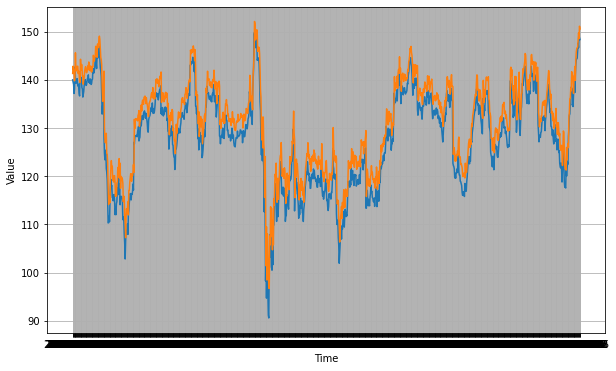

In [92]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, rnn_forecast)

In [93]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

3.4540987

In [94]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                    batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
reset_states = ResetStatesCallback()
optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100,
                    callbacks=[lr_schedule, reset_states])

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


146/146 [==============================] - 3s 10ms/step - loss: 148.6111 - mae: 149.1111 - lr: 1.0000e-08
Epoch 2/100
146/146 [==============================] - 1s 10ms/step - loss: 90.2761 - mae: 90.7760 - lr: 1.1220e-08
Epoch 3/100
146/146 [==============================] - 1s 10ms/step - loss: 38.2330 - mae: 38.7328 - lr: 1.2589e-08
Epoch 4/100
146/146 [==============================] - 1s 10ms/step - loss: 28.0462 - mae: 28.5448 - lr: 1.4125e-08
Epoch 5/100
146/146 [==============================] - 1s 10ms/step - loss: 27.9300 - mae: 28.4275 - lr: 1.5849e-08
Epoch 6/100
146/146 [==============================] - 1s 10ms/step - loss: 27.5453 - mae: 28.0416 - lr: 1.7783e-08
Epoch 7/100
146/146 [==============================] - 2s 10ms/step - loss: 26.0738 - mae: 26.5696 - lr: 1.9953e-08
Epoch 8/100
146/146 [==============================] - 2s 10ms/step - loss: 24.2380 - mae: 24.7326 - lr: 2.2387e-08
Epoch 9/100
146/146 [==============================] - 2s 10ms/step - loss: 21.885

146/146 [==============================] - 2s 11ms/step - loss: 12.9785 - mae: 13.4691 - lr: 3.1623e-05
Epoch 72/100
146/146 [==============================] - 2s 13ms/step - loss: 13.2095 - mae: 13.7000 - lr: 3.5481e-05
Epoch 73/100
146/146 [==============================] - 2s 11ms/step - loss: 14.6679 - mae: 15.1591 - lr: 3.9811e-05
Epoch 74/100
146/146 [==============================] - 2s 11ms/step - loss: 13.3311 - mae: 13.8238 - lr: 4.4668e-05
Epoch 75/100
146/146 [==============================] - 2s 11ms/step - loss: 13.7003 - mae: 14.1899 - lr: 5.0119e-05
Epoch 76/100
146/146 [==============================] - 2s 13ms/step - loss: 14.9485 - mae: 15.4427 - lr: 5.6234e-05
Epoch 77/100
146/146 [==============================] - 2s 12ms/step - loss: 16.4481 - mae: 16.9428 - lr: 6.3096e-05
Epoch 78/100
146/146 [==============================] - 2s 12ms/step - loss: 17.7586 - mae: 18.2543 - lr: 7.0795e-05
Epoch 79/100
146/146 [==============================] - 2s 12ms/step - loss: 

(1e-08, 0.0001, 0.0, 30.0)

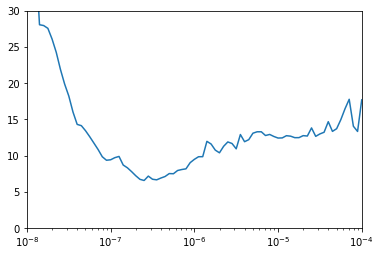

In [95]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [96]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = sequential_window_dataset(x_train, window_size)
valid_set = sequential_window_dataset(x_valid, window_size)

model = keras.models.Sequential([
  keras.layers.LSTM(100, return_sequences=True, stateful=True,
                         batch_input_shape=[1, None, 1]),
  keras.layers.LSTM(100, return_sequences=True, stateful=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200.0)
])
optimizer = keras.optimizers.SGD(lr=2.5e-7, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
reset_states = ResetStatesCallback()
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint, reset_states])

Epoch 1/500
146/146 [==============================] - 4s 15ms/step - loss: 25.2188 - mae: 25.7138 - val_loss: 21.1716 - val_mae: 21.6712
Epoch 2/500
146/146 [==============================] - 2s 11ms/step - loss: 16.6072 - mae: 17.1022 - val_loss: 25.0900 - val_mae: 25.5900
Epoch 3/500
146/146 [==============================] - 2s 12ms/step - loss: 17.3095 - mae: 17.8065 - val_loss: 23.0399 - val_mae: 23.5399
Epoch 4/500
146/146 [==============================] - 2s 12ms/step - loss: 18.5828 - mae: 19.0740 - val_loss: 16.7498 - val_mae: 17.2486
Epoch 5/500
146/146 [==============================] - 2s 13ms/step - loss: 16.7414 - mae: 17.2371 - val_loss: 16.4254 - val_mae: 16.9246
Epoch 6/500
146/146 [==============================] - 2s 13ms/step - loss: 16.2584 - mae: 16.7534 - val_loss: 15.0228 - val_mae: 15.5199
Epoch 7/500
146/146 [==============================] - 2s 12ms/step - loss: 15.5521 - mae: 16.0468 - val_loss: 14.5892 - val_mae: 15.0853
Epoch 8/500
146/146 [=============

146/146 [==============================] - 2s 12ms/step - loss: 7.0324 - mae: 7.5127 - val_loss: 13.7281 - val_mae: 14.2281
Epoch 61/500
146/146 [==============================] - 2s 12ms/step - loss: 7.1504 - mae: 7.6330 - val_loss: 13.5568 - val_mae: 14.0567
Epoch 62/500
146/146 [==============================] - 2s 12ms/step - loss: 7.2371 - mae: 7.7199 - val_loss: 13.3627 - val_mae: 13.8625
Epoch 63/500
146/146 [==============================] - 2s 12ms/step - loss: 7.2902 - mae: 7.7729 - val_loss: 13.1776 - val_mae: 13.6773
Epoch 64/500
146/146 [==============================] - 2s 12ms/step - loss: 7.3457 - mae: 7.8289 - val_loss: 12.9404 - val_mae: 13.4400
Epoch 65/500
146/146 [==============================] - 2s 12ms/step - loss: 7.4250 - mae: 7.9084 - val_loss: 12.5102 - val_mae: 13.0094
Epoch 66/500
146/146 [==============================] - 2s 12ms/step - loss: 7.4820 - mae: 7.9643 - val_loss: 12.1684 - val_mae: 12.6676
Epoch 67/500
146/146 [==============================] 

146/146 [==============================] - 2s 13ms/step - loss: 8.1757 - mae: 8.6603 - val_loss: 6.7915 - val_mae: 7.2843
Epoch 121/500
146/146 [==============================] - 2s 12ms/step - loss: 8.2578 - mae: 8.7433 - val_loss: 6.7081 - val_mae: 7.2004
Epoch 122/500
146/146 [==============================] - 2s 12ms/step - loss: 8.3118 - mae: 8.7959 - val_loss: 6.6902 - val_mae: 7.1825
Epoch 123/500
146/146 [==============================] - 2s 13ms/step - loss: 8.3807 - mae: 8.8649 - val_loss: 6.4412 - val_mae: 6.9312
Epoch 124/500
146/146 [==============================] - 2s 13ms/step - loss: 8.4492 - mae: 8.9334 - val_loss: 6.2112 - val_mae: 6.6984
Epoch 125/500
146/146 [==============================] - 2s 13ms/step - loss: 8.4629 - mae: 8.9470 - val_loss: 6.1171 - val_mae: 6.6022
Epoch 126/500
146/146 [==============================] - 2s 13ms/step - loss: 8.4491 - mae: 8.9334 - val_loss: 6.0915 - val_mae: 6.5757
Epoch 127/500
146/146 [==============================] - 2s 12

146/146 [==============================] - 2s 13ms/step - loss: 7.8192 - mae: 8.3009 - val_loss: 5.5042 - val_mae: 5.9864
Epoch 181/500
146/146 [==============================] - 2s 13ms/step - loss: 7.8190 - mae: 8.3005 - val_loss: 5.4755 - val_mae: 5.9579
Epoch 182/500
146/146 [==============================] - 2s 13ms/step - loss: 7.8191 - mae: 8.3005 - val_loss: 5.4462 - val_mae: 5.9287
Epoch 183/500
146/146 [==============================] - 2s 13ms/step - loss: 7.8195 - mae: 8.3008 - val_loss: 5.4174 - val_mae: 5.9000
Epoch 184/500
146/146 [==============================] - 2s 13ms/step - loss: 7.8196 - mae: 8.3009 - val_loss: 5.3911 - val_mae: 5.8737
Epoch 185/500
146/146 [==============================] - 2s 13ms/step - loss: 7.8197 - mae: 8.3009 - val_loss: 5.3678 - val_mae: 5.8505
Epoch 186/500
146/146 [==============================] - 2s 13ms/step - loss: 7.8199 - mae: 8.3011 - val_loss: 5.3498 - val_mae: 5.8323
Epoch 187/500
146/146 [==============================] - 2s 13

146/146 [==============================] - 2s 13ms/step - loss: 7.5253 - mae: 8.0066 - val_loss: 4.9103 - val_mae: 5.3906
Epoch 241/500
146/146 [==============================] - 2s 12ms/step - loss: 7.5119 - mae: 7.9930 - val_loss: 4.8942 - val_mae: 5.3744
Epoch 242/500
146/146 [==============================] - 2s 13ms/step - loss: 7.4980 - mae: 7.9790 - val_loss: 4.8769 - val_mae: 5.3570
Epoch 243/500
146/146 [==============================] - 2s 13ms/step - loss: 7.4835 - mae: 7.9643 - val_loss: 4.8587 - val_mae: 5.3388
Epoch 244/500
146/146 [==============================] - 2s 13ms/step - loss: 7.4684 - mae: 7.9491 - val_loss: 4.8398 - val_mae: 5.3199
Epoch 245/500
146/146 [==============================] - 2s 13ms/step - loss: 7.4530 - mae: 7.9336 - val_loss: 4.8204 - val_mae: 5.3005
Epoch 246/500
146/146 [==============================] - 2s 13ms/step - loss: 7.4371 - mae: 7.9176 - val_loss: 4.8010 - val_mae: 5.2811
Epoch 247/500
146/146 [==============================] - 2s 13

146/146 [==============================] - 2s 13ms/step - loss: 7.1110 - mae: 7.5889 - val_loss: 4.5307 - val_mae: 5.0104
Epoch 301/500
146/146 [==============================] - 2s 12ms/step - loss: 7.1080 - mae: 7.5859 - val_loss: 4.5328 - val_mae: 5.0125
Epoch 302/500
146/146 [==============================] - 2s 13ms/step - loss: 7.1051 - mae: 7.5829 - val_loss: 4.5345 - val_mae: 5.0142
Epoch 303/500
146/146 [==============================] - 2s 12ms/step - loss: 7.1021 - mae: 7.5799 - val_loss: 4.5363 - val_mae: 5.0160
Epoch 304/500
146/146 [==============================] - 2s 12ms/step - loss: 7.0987 - mae: 7.5765 - val_loss: 4.5383 - val_mae: 5.0180
Epoch 305/500
146/146 [==============================] - 2s 12ms/step - loss: 7.0953 - mae: 7.5731 - val_loss: 4.5397 - val_mae: 5.0194
Epoch 306/500
146/146 [==============================] - 2s 12ms/step - loss: 7.0919 - mae: 7.5697 - val_loss: 4.5407 - val_mae: 5.0204
Epoch 307/500
146/146 [==============================] - 2s 12

146/146 [==============================] - 2s 13ms/step - loss: 7.0496 - mae: 7.5238 - val_loss: 5.0082 - val_mae: 5.4896
Epoch 361/500
146/146 [==============================] - 2s 13ms/step - loss: 7.0547 - mae: 7.5288 - val_loss: 5.0341 - val_mae: 5.5156
Epoch 362/500
146/146 [==============================] - 2s 13ms/step - loss: 7.0600 - mae: 7.5339 - val_loss: 5.0606 - val_mae: 5.5422
Epoch 363/500
146/146 [==============================] - 2s 12ms/step - loss: 7.0655 - mae: 7.5394 - val_loss: 5.0867 - val_mae: 5.5684
Epoch 364/500
146/146 [==============================] - 2s 13ms/step - loss: 7.0712 - mae: 7.5451 - val_loss: 5.1125 - val_mae: 5.5942
Epoch 365/500
146/146 [==============================] - 2s 13ms/step - loss: 7.0771 - mae: 7.5509 - val_loss: 5.1359 - val_mae: 5.6177
Epoch 366/500
146/146 [==============================] - 2s 12ms/step - loss: 7.0831 - mae: 7.5569 - val_loss: 5.1598 - val_mae: 5.6416
Epoch 367/500
146/146 [==============================] - 2s 12

In [97]:
model = keras.models.load_model("my_checkpoint.h5")

In [98]:
model.reset_states()
rnn_forecast = model.predict(prices[np.newaxis, :, np.newaxis])
rnn_forecast = rnn_forecast[0, split_val - 1:-1, 0]

C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/1427574166.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model.predict(prices[np.newaxis, :, np.newaxis])


1/1 [==============================] - 1s 982ms/step


C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


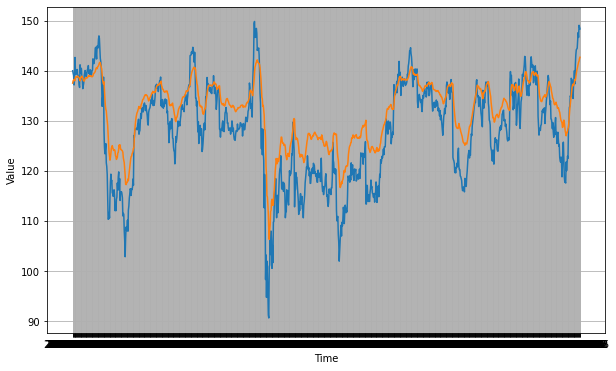

In [99]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, rnn_forecast)

In [100]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

4.890465

In [101]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


35/35 [==============================] - 4s 28ms/step - loss: 166.5218 - mae: 167.0219 - lr: 1.0000e-08
Epoch 2/100
35/35 [==============================] - 1s 27ms/step - loss: 136.7678 - mae: 137.2679 - lr: 1.1220e-08
Epoch 3/100
35/35 [==============================] - 1s 26ms/step - loss: 127.1435 - mae: 127.6435 - lr: 1.2589e-08
Epoch 4/100
35/35 [==============================] - 1s 26ms/step - loss: 119.9213 - mae: 120.4213 - lr: 1.4125e-08
Epoch 5/100
35/35 [==============================] - 1s 26ms/step - loss: 112.7436 - mae: 113.2436 - lr: 1.5849e-08
Epoch 6/100
35/35 [==============================] - 1s 27ms/step - loss: 105.2846 - mae: 105.7846 - lr: 1.7783e-08
Epoch 7/100
35/35 [==============================] - 1s 27ms/step - loss: 98.6854 - mae: 99.1854 - lr: 1.9953e-08
Epoch 8/100
35/35 [==============================] - 1s 28ms/step - loss: 92.9892 - mae: 93.4892 - lr: 2.2387e-08
Epoch 9/100
35/35 [==============================] - 1s 27ms/step - loss: 87.6678 - mae:

35/35 [==============================] - 1s 29ms/step - loss: 36.3952 - mae: 36.8929 - lr: 3.5481e-05
Epoch 73/100
35/35 [==============================] - 1s 29ms/step - loss: 34.6562 - mae: 35.1536 - lr: 3.9811e-05
Epoch 74/100
35/35 [==============================] - 1s 29ms/step - loss: 28.5721 - mae: 29.0687 - lr: 4.4668e-05
Epoch 75/100
35/35 [==============================] - 1s 29ms/step - loss: 27.0149 - mae: 27.5111 - lr: 5.0119e-05
Epoch 76/100
35/35 [==============================] - 1s 29ms/step - loss: 30.2823 - mae: 30.7793 - lr: 5.6234e-05
Epoch 77/100
35/35 [==============================] - 1s 29ms/step - loss: 29.4937 - mae: 29.9899 - lr: 6.3096e-05
Epoch 78/100
35/35 [==============================] - 1s 29ms/step - loss: 30.6444 - mae: 31.1406 - lr: 7.0795e-05
Epoch 79/100
35/35 [==============================] - 1s 29ms/step - loss: 28.4530 - mae: 28.9495 - lr: 7.9433e-05
Epoch 80/100
35/35 [==============================] - 1s 29ms/step - loss: 28.7400 - mae: 29.

(1e-08, 0.0001, 0.0, 30.0)

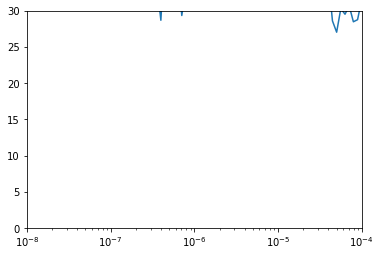

In [102]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [103]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 30
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential([
  keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.LSTM(32, return_sequences=True),
  keras.layers.Dense(1),
  keras.layers.Lambda(lambda x: x * 200)
])
optimizer = keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
model.fit(train_set, epochs=500,
          validation_data=valid_set,
          callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
35/35 [==============================] - 4s 51ms/step - loss: 40.1909 - mae: 40.6874 - val_loss: 26.8153 - val_mae: 27.3148
Epoch 2/500
35/35 [==============================] - 1s 32ms/step - loss: 31.1684 - mae: 31.6651 - val_loss: 22.4923 - val_mae: 22.9915
Epoch 3/500
35/35 [==============================] - 1s 33ms/step - loss: 34.3366 - mae: 34.8336 - val_loss: 10.1722 - val_mae: 10.6591
Epoch 4/500
35/35 [==============================] - 1s 32ms/step - loss: 30.4413 - mae: 30.9382 - val_loss: 8.9692 - val_mae: 9.4546
Epoch 5/500
35/35 [==============================] - 1s 32ms/step - loss: 29.1786 - mae: 29.6751 - val_loss: 9.1771 - val_mae: 9.6626
Epoch 6/500
35/35 [==============================] - 1s 32ms/step - loss: 30.1896 - mae: 30.6859 - val_loss: 9.1408 - val_mae: 9.6272
Epoch 7/500
35/35 [==============================] - 1s 32ms/step - loss: 30.6097 - mae: 31.1064 - val_loss: 9.4546 - val_mae: 9.9413
Epoch 8/500
35/35 [==============================] - 1s 

In [104]:
model = keras.models.load_model("my_checkpoint.h5")

In [105]:
rnn_forecast = model_forecast(model, prices[:,  np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_val - window_size:-1, -1, 0]

C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/3142917127.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  rnn_forecast = model_forecast(model, prices[:,  np.newaxis], window_size)


172/172 [==============================] - 2s 7ms/step


C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


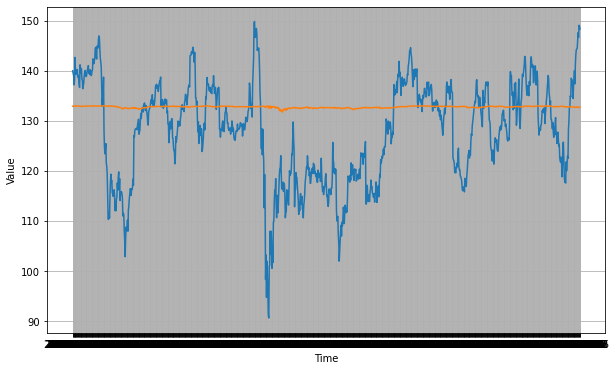

In [106]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, rnn_forecast)

In [107]:
keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

8.574967

In [108]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
lr_schedule = keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-4 * 10**(epoch / 30))
optimizer = keras.optimizers.Adam(lr=1e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Epoch 1/100


C:\Users\Admin\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


34/34 [==============================] - 3s 55ms/step - loss: 122.6936 - mae: 123.1936 - lr: 1.0000e-04
Epoch 2/100
34/34 [==============================] - 2s 52ms/step - loss: 116.2686 - mae: 116.7686 - lr: 1.0798e-04
Epoch 3/100
34/34 [==============================] - 2s 50ms/step - loss: 97.4469 - mae: 97.9469 - lr: 1.1659e-04
Epoch 4/100
34/34 [==============================] - 2s 50ms/step - loss: 53.9408 - mae: 54.4394 - lr: 1.2589e-04
Epoch 5/100
34/34 [==============================] - 2s 52ms/step - loss: 37.3676 - mae: 37.8604 - lr: 1.3594e-04
Epoch 6/100
34/34 [==============================] - 2s 48ms/step - loss: 22.7541 - mae: 23.2453 - lr: 1.4678e-04
Epoch 7/100
34/34 [==============================] - 2s 46ms/step - loss: 10.5521 - mae: 11.0267 - lr: 1.5849e-04
Epoch 8/100
34/34 [==============================] - 2s 48ms/step - loss: 7.2148 - mae: 7.6773 - lr: 1.7113e-04
Epoch 9/100
34/34 [==============================] - 2s 50ms/step - loss: 5.9168 - mae: 6.3729 - l

Epoch 75/100
34/34 [==============================] - 2s 48ms/step - loss: 27.7946 - mae: 28.2920 - lr: 0.0293
Epoch 76/100
34/34 [==============================] - 2s 47ms/step - loss: 18.6160 - mae: 19.1127 - lr: 0.0316
Epoch 77/100
34/34 [==============================] - 2s 49ms/step - loss: 9.1498 - mae: 9.6307 - lr: 0.0341
Epoch 78/100
34/34 [==============================] - 2s 48ms/step - loss: 12.0616 - mae: 12.5519 - lr: 0.0369
Epoch 79/100
34/34 [==============================] - 2s 47ms/step - loss: 12.1258 - mae: 12.6185 - lr: 0.0398
Epoch 80/100
34/34 [==============================] - 2s 47ms/step - loss: 7.2033 - mae: 7.6902 - lr: 0.0430
Epoch 81/100
34/34 [==============================] - 2s 46ms/step - loss: 15.2751 - mae: 15.7658 - lr: 0.0464
Epoch 82/100
34/34 [==============================] - 2s 47ms/step - loss: 13.0624 - mae: 13.5510 - lr: 0.0501
Epoch 83/100
34/34 [==============================] - 2s 48ms/step - loss: 16.7486 - mae: 17.2422 - lr: 0.0541
Epoch

(0.0001, 0.1, 0.0, 30.0)

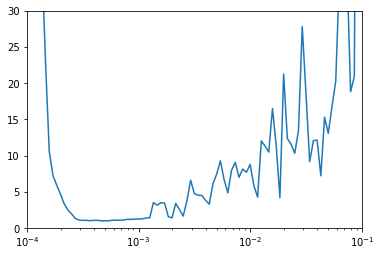

In [109]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-4, 1e-1, 0, 30])

In [110]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

window_size = 64
train_set = seq2seq_window_dataset(x_train, window_size,
                                   batch_size=128)
valid_set = seq2seq_window_dataset(x_valid, window_size,
                                   batch_size=128)

model = keras.models.Sequential()
model.add(keras.layers.InputLayer(input_shape=[None, 1]))
for dilation_rate in (1, 2, 4, 8, 16, 32):
    model.add(
      keras.layers.Conv1D(filters=32,
                          kernel_size=2,
                          strides=1,
                          dilation_rate=dilation_rate,
                          padding="causal",
                          activation="relu")
    )
model.add(keras.layers.Conv1D(filters=1, kernel_size=1))
optimizer = keras.optimizers.Adam(lr=3e-4)
model.compile(loss=keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

model_checkpoint = keras.callbacks.ModelCheckpoint(
    "my_checkpoint.h5", save_best_only=True)
early_stopping = keras.callbacks.EarlyStopping(patience=50)
history = model.fit(train_set, epochs=500,
                    validation_data=valid_set,
                    callbacks=[early_stopping, model_checkpoint])

Epoch 1/500
34/34 [==============================] - 3s 66ms/step - loss: 102.1998 - mae: 102.6998 - val_loss: 76.0586 - val_mae: 76.5586
Epoch 2/500
34/34 [==============================] - 2s 55ms/step - loss: 50.1957 - mae: 50.6938 - val_loss: 42.6282 - val_mae: 43.1255
Epoch 3/500
34/34 [==============================] - 2s 60ms/step - loss: 31.0600 - mae: 31.5548 - val_loss: 19.6618 - val_mae: 20.1490
Epoch 4/500
34/34 [==============================] - 2s 58ms/step - loss: 11.6776 - mae: 12.1570 - val_loss: 7.9774 - val_mae: 8.4516
Epoch 5/500
34/34 [==============================] - 2s 54ms/step - loss: 5.4484 - mae: 5.9138 - val_loss: 4.3655 - val_mae: 4.8304
Epoch 6/500
34/34 [==============================] - 2s 57ms/step - loss: 2.9299 - mae: 3.3816 - val_loss: 2.7798 - val_mae: 3.2339
Epoch 7/500
34/34 [==============================] - 2s 55ms/step - loss: 1.9881 - mae: 2.4306 - val_loss: 2.1272 - val_mae: 2.5730
Epoch 8/500
34/34 [==============================] - 2s 61ms

34/34 [==============================] - 2s 43ms/step - loss: 0.8341 - mae: 1.2330 - val_loss: 1.1293 - val_mae: 1.5447
Epoch 63/500
34/34 [==============================] - 1s 35ms/step - loss: 0.8514 - mae: 1.2524 - val_loss: 1.0940 - val_mae: 1.5124
Epoch 64/500
34/34 [==============================] - 2s 43ms/step - loss: 0.8132 - mae: 1.2097 - val_loss: 1.0986 - val_mae: 1.5199
Epoch 65/500
34/34 [==============================] - 2s 41ms/step - loss: 0.8173 - mae: 1.2144 - val_loss: 1.1200 - val_mae: 1.5440
Epoch 66/500
34/34 [==============================] - 1s 35ms/step - loss: 0.8218 - mae: 1.2193 - val_loss: 1.0965 - val_mae: 1.5139
Epoch 67/500
34/34 [==============================] - 1s 36ms/step - loss: 0.8439 - mae: 1.2436 - val_loss: 1.1069 - val_mae: 1.5293
Epoch 68/500
34/34 [==============================] - 2s 43ms/step - loss: 0.8564 - mae: 1.2578 - val_loss: 1.1629 - val_mae: 1.5890
Epoch 69/500
34/34 [==============================] - 2s 41ms/step - loss: 0.8293 

34/34 [==============================] - 2s 56ms/step - loss: 0.8089 - mae: 1.2053 - val_loss: 1.0864 - val_mae: 1.5050
Epoch 124/500
34/34 [==============================] - 2s 56ms/step - loss: 0.8058 - mae: 1.2019 - val_loss: 1.1004 - val_mae: 1.5219
Epoch 125/500
34/34 [==============================] - 2s 53ms/step - loss: 0.8229 - mae: 1.2208 - val_loss: 1.0884 - val_mae: 1.5057
Epoch 126/500
34/34 [==============================] - 1s 23ms/step - loss: 0.8207 - mae: 1.2180 - val_loss: 1.1124 - val_mae: 1.5351
Epoch 127/500
34/34 [==============================] - 1s 24ms/step - loss: 0.8199 - mae: 1.2172 - val_loss: 1.0888 - val_mae: 1.5061
Epoch 128/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8214 - mae: 1.2192 - val_loss: 1.0866 - val_mae: 1.5053
Epoch 129/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8189 - mae: 1.2164 - val_loss: 1.1005 - val_mae: 1.5165
Epoch 130/500
34/34 [==============================] - 1s 21ms/step - loss: 

34/34 [==============================] - 2s 55ms/step - loss: 0.8151 - mae: 1.2122 - val_loss: 1.1461 - val_mae: 1.5712
Epoch 185/500
34/34 [==============================] - 2s 58ms/step - loss: 0.8169 - mae: 1.2148 - val_loss: 1.0844 - val_mae: 1.5026
Epoch 186/500
34/34 [==============================] - 2s 58ms/step - loss: 0.8023 - mae: 1.1982 - val_loss: 1.1167 - val_mae: 1.5395
Epoch 187/500
34/34 [==============================] - 2s 55ms/step - loss: 0.8267 - mae: 1.2251 - val_loss: 1.1028 - val_mae: 1.5188
Epoch 188/500
34/34 [==============================] - 2s 57ms/step - loss: 0.8144 - mae: 1.2113 - val_loss: 1.0928 - val_mae: 1.5093
Epoch 189/500
34/34 [==============================] - 2s 56ms/step - loss: 0.8185 - mae: 1.2159 - val_loss: 1.1367 - val_mae: 1.5611
Epoch 190/500
34/34 [==============================] - 2s 58ms/step - loss: 0.8282 - mae: 1.2267 - val_loss: 1.0868 - val_mae: 1.5059
Epoch 191/500
34/34 [==============================] - 2s 56ms/step - loss: 

34/34 [==============================] - 1s 34ms/step - loss: 0.8139 - mae: 1.2109 - val_loss: 1.1140 - val_mae: 1.5298
Epoch 246/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8403 - mae: 1.2405 - val_loss: 1.0892 - val_mae: 1.5087
Epoch 247/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8040 - mae: 1.2004 - val_loss: 1.1184 - val_mae: 1.5413
Epoch 248/500
34/34 [==============================] - 1s 24ms/step - loss: 0.8140 - mae: 1.2113 - val_loss: 1.0984 - val_mae: 1.5194
Epoch 249/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8247 - mae: 1.2229 - val_loss: 1.1002 - val_mae: 1.5161
Epoch 250/500
34/34 [==============================] - 1s 22ms/step - loss: 0.8408 - mae: 1.2406 - val_loss: 1.0957 - val_mae: 1.5118
Epoch 251/500
34/34 [==============================] - 1s 22ms/step - loss: 0.8146 - mae: 1.2118 - val_loss: 1.1213 - val_mae: 1.5443
Epoch 252/500
34/34 [==============================] - 1s 34ms/step - loss: 

34/34 [==============================] - 1s 21ms/step - loss: 0.8053 - mae: 1.2018 - val_loss: 1.0955 - val_mae: 1.5160
Epoch 307/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8228 - mae: 1.2209 - val_loss: 1.1310 - val_mae: 1.5550
Epoch 308/500
34/34 [==============================] - 1s 22ms/step - loss: 0.8288 - mae: 1.2276 - val_loss: 1.0827 - val_mae: 1.5004
Epoch 309/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8039 - mae: 1.2001 - val_loss: 1.0836 - val_mae: 1.5008
Epoch 310/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8139 - mae: 1.2108 - val_loss: 1.1248 - val_mae: 1.5406
Epoch 311/500
34/34 [==============================] - 1s 32ms/step - loss: 0.8494 - mae: 1.2499 - val_loss: 1.2145 - val_mae: 1.6336
Epoch 312/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8413 - mae: 1.2419 - val_loss: 1.0839 - val_mae: 1.5024
Epoch 313/500
34/34 [==============================] - 1s 21ms/step - loss: 

34/34 [==============================] - 1s 21ms/step - loss: 0.8183 - mae: 1.2159 - val_loss: 1.1033 - val_mae: 1.5247
Epoch 368/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8110 - mae: 1.2078 - val_loss: 1.0926 - val_mae: 1.5127
Epoch 369/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8055 - mae: 1.2021 - val_loss: 1.0907 - val_mae: 1.5104
Epoch 370/500
34/34 [==============================] - 1s 23ms/step - loss: 0.8059 - mae: 1.2023 - val_loss: 1.0877 - val_mae: 1.5043
Epoch 371/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8405 - mae: 1.2400 - val_loss: 1.0899 - val_mae: 1.5095
Epoch 372/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8199 - mae: 1.2178 - val_loss: 1.0930 - val_mae: 1.5132
Epoch 373/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8110 - mae: 1.2081 - val_loss: 1.0857 - val_mae: 1.5047
Epoch 374/500
34/34 [==============================] - 1s 21ms/step - loss: 

34/34 [==============================] - 1s 21ms/step - loss: 0.8354 - mae: 1.2353 - val_loss: 1.1256 - val_mae: 1.5493
Epoch 429/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8090 - mae: 1.2060 - val_loss: 1.0868 - val_mae: 1.5062
Epoch 430/500
34/34 [==============================] - 1s 22ms/step - loss: 0.8057 - mae: 1.2024 - val_loss: 1.0816 - val_mae: 1.4992
Epoch 431/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8247 - mae: 1.2228 - val_loss: 1.0839 - val_mae: 1.5028
Epoch 432/500
34/34 [==============================] - 1s 20ms/step - loss: 0.8116 - mae: 1.2088 - val_loss: 1.0849 - val_mae: 1.5019
Epoch 433/500
34/34 [==============================] - 1s 22ms/step - loss: 0.8042 - mae: 1.2003 - val_loss: 1.0825 - val_mae: 1.4998
Epoch 434/500
34/34 [==============================] - 1s 21ms/step - loss: 0.8162 - mae: 1.2136 - val_loss: 1.1248 - val_mae: 1.5484
Epoch 435/500
34/34 [==============================] - 1s 23ms/step - loss: 

34/34 [==============================] - 2s 56ms/step - loss: 0.8052 - mae: 1.2019 - val_loss: 1.1106 - val_mae: 1.5331
Epoch 490/500
34/34 [==============================] - 2s 54ms/step - loss: 0.8364 - mae: 1.2357 - val_loss: 1.1738 - val_mae: 1.6014
Epoch 491/500
34/34 [==============================] - 2s 54ms/step - loss: 0.8457 - mae: 1.2470 - val_loss: 1.0866 - val_mae: 1.5032
Epoch 492/500
34/34 [==============================] - 2s 53ms/step - loss: 0.8021 - mae: 1.1981 - val_loss: 1.0998 - val_mae: 1.5211
Epoch 493/500
34/34 [==============================] - 2s 54ms/step - loss: 0.8041 - mae: 1.2005 - val_loss: 1.1053 - val_mae: 1.5274
Epoch 494/500
34/34 [==============================] - 2s 53ms/step - loss: 0.8043 - mae: 1.2009 - val_loss: 1.0845 - val_mae: 1.5037
Epoch 495/500
34/34 [==============================] - 2s 53ms/step - loss: 0.8071 - mae: 1.2037 - val_loss: 1.0819 - val_mae: 1.5003
Epoch 496/500
34/34 [==============================] - 2s 52ms/step - loss: 

In [111]:
model = keras.models.load_model("my_checkpoint.h5")

In [112]:
cnn_forecast = model_forecast(model, prices[..., np.newaxis], window_size)
cnn_forecast = cnn_forecast[split_val - window_size:-1, -1, 0]

C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2484313619.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cnn_forecast = model_forecast(model, prices[..., np.newaxis], window_size)


171/171 [==============================] - 1s 4ms/step


C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)
C:\Users\Admin\AppData\Local\Temp/ipykernel_8548/2983284895.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  plt.plot(time[start:end], series[start:end], format, label=label)


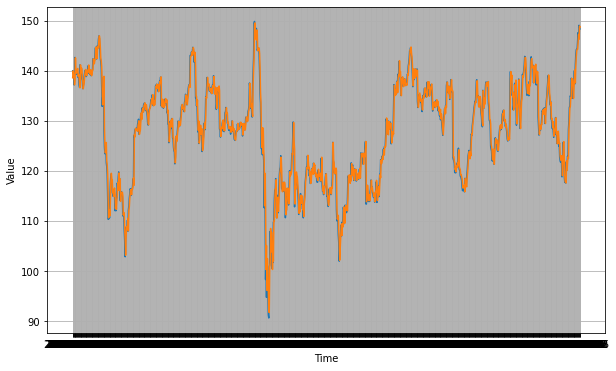

In [113]:
plt.figure(figsize=(10, 6))
plot_series(time_val, x_valid)
plot_series(time_val, cnn_forecast)

In [114]:
keras.metrics.mean_absolute_error(x_valid, cnn_forecast).numpy()

1.4911224